In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Необходимые массивы плотности скорости и давления

In [159]:
N = 1000

r = np.zeros(N+1)
p = np.zeros(N+1)
u = np.zeros(N+1)

x = np.linspace(0, 1, N+1)
h = (x[1]-x[0])
Q = np.array([[1.1 for i in range(0,N+1)] for j in range(0,3)])
F = Q
S = Q
Q_current = Q


Начальные условия

In [160]:
r[0] = 1
u[0] = 1.023
p[0] = 8


r[N] = 0.1933880
u[N] = 5.2937598
p[N] = 0.8018469

gamma = 1.4
c = 3000
eps = 0.000001

def e(r, p, u):
    return p/(r*(gamma - 1)) + u**2/2

# r[0] = 1
# u[0] = 1.0237498
# p[0] = 8

# r[N] = 0.8835893
# u[N] = 1.1586268
# p[N] = 7.0315580

Форма сопла

In [161]:
a_0, x_0 = 0.5, 0.5

def a(x):
    return a_0 + (1-a_0)*(1-x/x_0)**2
d_a = np.linspace(0, 1 , N+1)

for i in range(1, N):
    d_a[i] = (a(x[i+1]) - a(x[i]))/h*0.5
print(h)

0.001


In [162]:
r[1:-1] = r[N]
u[1:-1] = u[N]
p[1:-1] = p[N]



Q[0] = a(x)*r
Q[1] = a(x)*r*u
Q[2] = a(x)*r*( p/(r*(gamma - 1)) + u**2/2 )


F[0] = a(x)*r*u
F[1] = a(x)*(r*u*u + p)
F[2] = a(x)*u*(r*p/(r*(gamma - 1)) + u**2/2 + p)

S[0] = 0
S[1] = p * d_a
S[2] = 0
print(p)
print(d_a)
print(S[1])

[8.        0.8018469 0.8018469 ... 0.8018469 0.8018469 0.8018469]
[ 0.    -0.997 -0.995 ...  0.997  0.999  1.   ]
[ 0.         -0.79944136 -0.79783767 ...  0.79944136  0.80104505
  0.8018469 ]


In [163]:

tau = 0.6 * h/max(u)
print(u, len(r))

[1.023     5.2937598 5.2937598 ... 5.2937598 5.2937598 5.2937598] 1001


In [164]:
for i in range(0, N+1):
    Q_current[:,1:-1] = 1/2 * (Q[:,0:-2] + Q[:,2:]) - tau/(2*h) * (F[:,2:] - F[:,0:-2]) + tau * S[:,1:-1]

    previous_r = np.copy(r)
    r[1:-1] = Q_current[0,1:-1]/a(x[1:-1])
    u[1:-1] = Q_current[1,1:-1]/(a(x[1:-1])*r[1:-1])
    p[1:-1] = (Q_current[2,1:-1]/(a(x[1:-1])*r[1:-1]) - u[1:-1]*u[1:-1]/2) * r[1:-1]*(gamma-1)

    M = u/c

    Q[0] = np.copy(Q_current[0])
    Q[1] = np.copy(Q_current[1])
    Q[2] = np.copy(Q_current[2])

    F[0] = a(x)*r*u
    F[1] = a(x)*(r*u*u + p)
    F[2] = a(x)*u*(r*(p/(r*(gamma - 1)) + u**2/2 + p))

    S[0] = 0
    S[1] = p * d_a
    S[2] = 0

    if ( max( abs((r-previous_r)/(previous_r * tau)) ) ) < eps:
        print(i)
        break

1


C:\Users\gerts\AppData\Local\Temp\ipykernel_11240\577031961.py:6: RuntimeWarning: divide by zero encountered in divide
  u[1:-1] = Q_current[1,1:-1]/(a(x[1:-1])*r[1:-1])
C:\Users\gerts\AppData\Local\Temp\ipykernel_11240\577031961.py:7: RuntimeWarning: invalid value encountered in divide
  p[1:-1] = (Q_current[2,1:-1]/(a(x[1:-1])*r[1:-1]) - u[1:-1]*u[1:-1]/2) * r[1:-1]*(gamma-1)
C:\Users\gerts\AppData\Local\Temp\ipykernel_11240\577031961.py:15: RuntimeWarning: invalid value encountered in multiply
  F[0] = a(x)*r*u
C:\Users\gerts\AppData\Local\Temp\ipykernel_11240\577031961.py:16: RuntimeWarning: invalid value encountered in multiply
  F[1] = a(x)*(r*u*u + p)
C:\Users\gerts\AppData\Local\Temp\ipykernel_11240\577031961.py:23: RuntimeWarning: invalid value encountered in divide
  if ( max( abs((r-previous_r)/(previous_r * tau)) ) ) < eps:


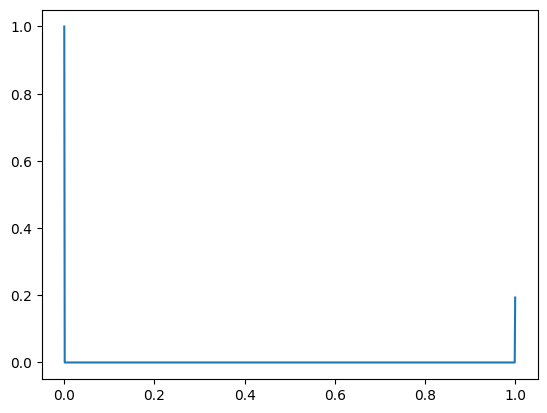

In [165]:
plt.plot(x,r)

5.2937598 0.00011334099442895008
[8.        0.8018469 0.8018469 ... 0.8018469 0.8018469 0.8018469]
[ 0.    -0.997 -0.995 ...  0.997  0.999  1.   ]
[ 0.         -1.60048641 -1.59727902 ...  1.59727902  1.60048641
  0.8018469 ]
-1.6004864123999982 0.8018469 -1.9959999999999978
18689


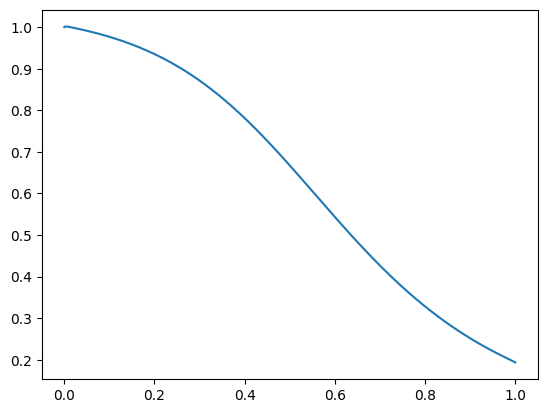

In [169]:
#схема Лакса-Фридрихса
import math as mt
import numpy as np
import matplotlib.pyplot as pl
eps = 0.0001
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n

#tau = 0.000001 ЗАДАН НИЖЕ
#0.000000001
#0.00000001


#инициализация#
x = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
dA = np.linspace(0, L, n+1)
e = np.linspace(0, L, n+1)

po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = np.linspace(0, L, n+1)
u = np.linspace(0, L, n+1)

Q = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
F = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
S = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qnext = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h  #4*x[i] - 2

#нач и гран условия#

#=====================================

#задача 1

po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.1933880
u[n] = 5.2937598
p[n] = 0.8018469

#задача 2

# po[0] = 1.0
# u[0] = 1.0237498
# p[0] = 8.0
# po[n] = 0.8835893
# u[n] = 1.1586268
# p[n] = 7.0315580

#=====================================

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]


#     ШАГ ПО ВРЕМЕНИ    #

tau = 0.6 * h/max(u)
print(max(u),tau)


#поэлементное умножение нампи
Q[0] = A*po
Q[1] = A*po*u
Q[2] = A*po*( u*u/2 + p/(po*(gamma-1)) )
Qnext = Q.copy()

F[0] = A*po*u
F[1] = A*(po*u*u + p)
F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

S[0] = 0
S[1] = p * dA
S[2] = 0
print(p)
print(d_a)

print(p[1] * dA[1], p[1], dA[1])
#расчет нового  q
#расчет новых давления скорости и плотности
#расчет новых f and s
for k in range(1000000): #1) 1000

    Qnext[:,1:-1] = 1/2 * (Q[:,0:-2] + Q[:,2:]) - tau/(2*h) * (F[:,2:] - F[:,0:-2]) + tau * S[:,1:-1]

    poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)

    M = u/c

    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()

    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0

    if ( max( abs((po-poprev)/(poprev* tau)) ) ) < eps:
        print(k)
        break



pl.plot(x,po)

with open('2DV.dat','w') as f:
        #f.write('TITLE = "-"\n')
        f.write('VARIABLES=" V1"," V2" \n')
        f.write('ZONE  I = 1001 \n' )#101 101
        for i in range(0,n+1):#0
            a = str(x[i]) +  " " +  str(po[i]) + str(" \n")
            f.write(a)

In [120]:
n = 10
F = np.array([[i for i in range(0,n+1)] for j in range(0,3)])

print(F)

print(F[1])

G = np.ones((3, n))
print(G)

G[:,1] = 4
print(G)

[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]]
[ 0  1  2  3  4  5  6  7  8  9 10]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 4. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 4. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 4. 1. 1. 1. 1. 1. 1. 1. 1.]]
